### Wine Quality Analysis
We'll perform the data analysis process of investigating a dataset on wine quality. We'll manipulate data with **NumPy** and **Pandas**, and do visualizations with **Matplotlib**.

We're going to investigate this dataset on physicochemical properties and quality ratings of red and white wine samples. Let's take a closer look at its attributes and pose some questions for our analysis!

#### Questions
- What chemical characteristics are most important in predicting the quality of wine?
- Is a certain type of wine (red or white) associated with higher quality?
- Do wines with higher alcoholic content receive better ratings?
- Do sweeter wines (more residual sugar) receive better ratings?
- What level of acidity is associated with the highest quality?

*Note: I've read the CSV files opening then in a spreadsheet to visualize more quickly the table structure.*

Source: This dataset is available for public research and education purposes. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
red_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                    sep = ';')

white_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                      sep = ';')

In [3]:
red_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
white_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


Attributes in Each Dataset: **Physicochemical Properties**

1. Fixed Acidity 
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

12. Quality  

In [6]:
print("Red Wine dataset has {} samples\nWhite Wine dataset has {} samples".
      format(red_df.shape[0], white_df.shape[0]))

Red Wine dataset has 1599 samples
White Wine dataset has 4898 samples


In [7]:
print("Red Wine dataset has {} columns\nWhite Wine dataset has {} columns".
      format(red_df.shape[1], white_df.shape[1]))

Red Wine dataset has 12 columns
White Wine dataset has 12 columns


In [9]:
# Missing values
print("Missing values in Red Wine dataset:\n\n{}\n\n\nMissing values in White Wine dataset:\n\n{}".
      format(red_df.isna().sum() , white_df.isna().sum()))

Missing values in Red Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Missing values in White Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# Duplicates
print("Red Wine dataset has {} duplicated values\nWhite Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Red Wine dataset has 240 duplicated values
White Wine dataset has 937 duplicated values


In [12]:
# Dropping duplicates
red_df = red_df.drop_duplicates();
white_df = white_df.drop_duplicates();

In [14]:
print("Now Red Wine dataset has {} duplicated values\nAnd White Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Now Red Wine dataset has 0 duplicated values
And White Wine dataset has 0 duplicated values


In [15]:
# Unique values
print("Unique values in Red Wine dataset:\n\n{}\n\nUnique values in White Wine dataset:\n\n{}".
      format(red_df.nunique() , white_df.nunique()))

Unique values in Red Wine dataset:

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Unique values in White Wine dataset:

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [16]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value 'red' or 'white'

In [18]:
color_red = np.repeat('red', red_df.shape[0])

color_white = np.repeat('white', white_df.shape[0])

In [20]:
red_df['color'] = color_red
red_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [21]:
white_df['color'] = color_white
white_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white


### Combine DataFrames

In [26]:
wine_df = red_df.append(white_df)

In [27]:
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [28]:
wine_df.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### Saving Dataset to CSV

In [29]:
wine_df.to_csv('winequality.csv', index=False)

### Univariate Plots

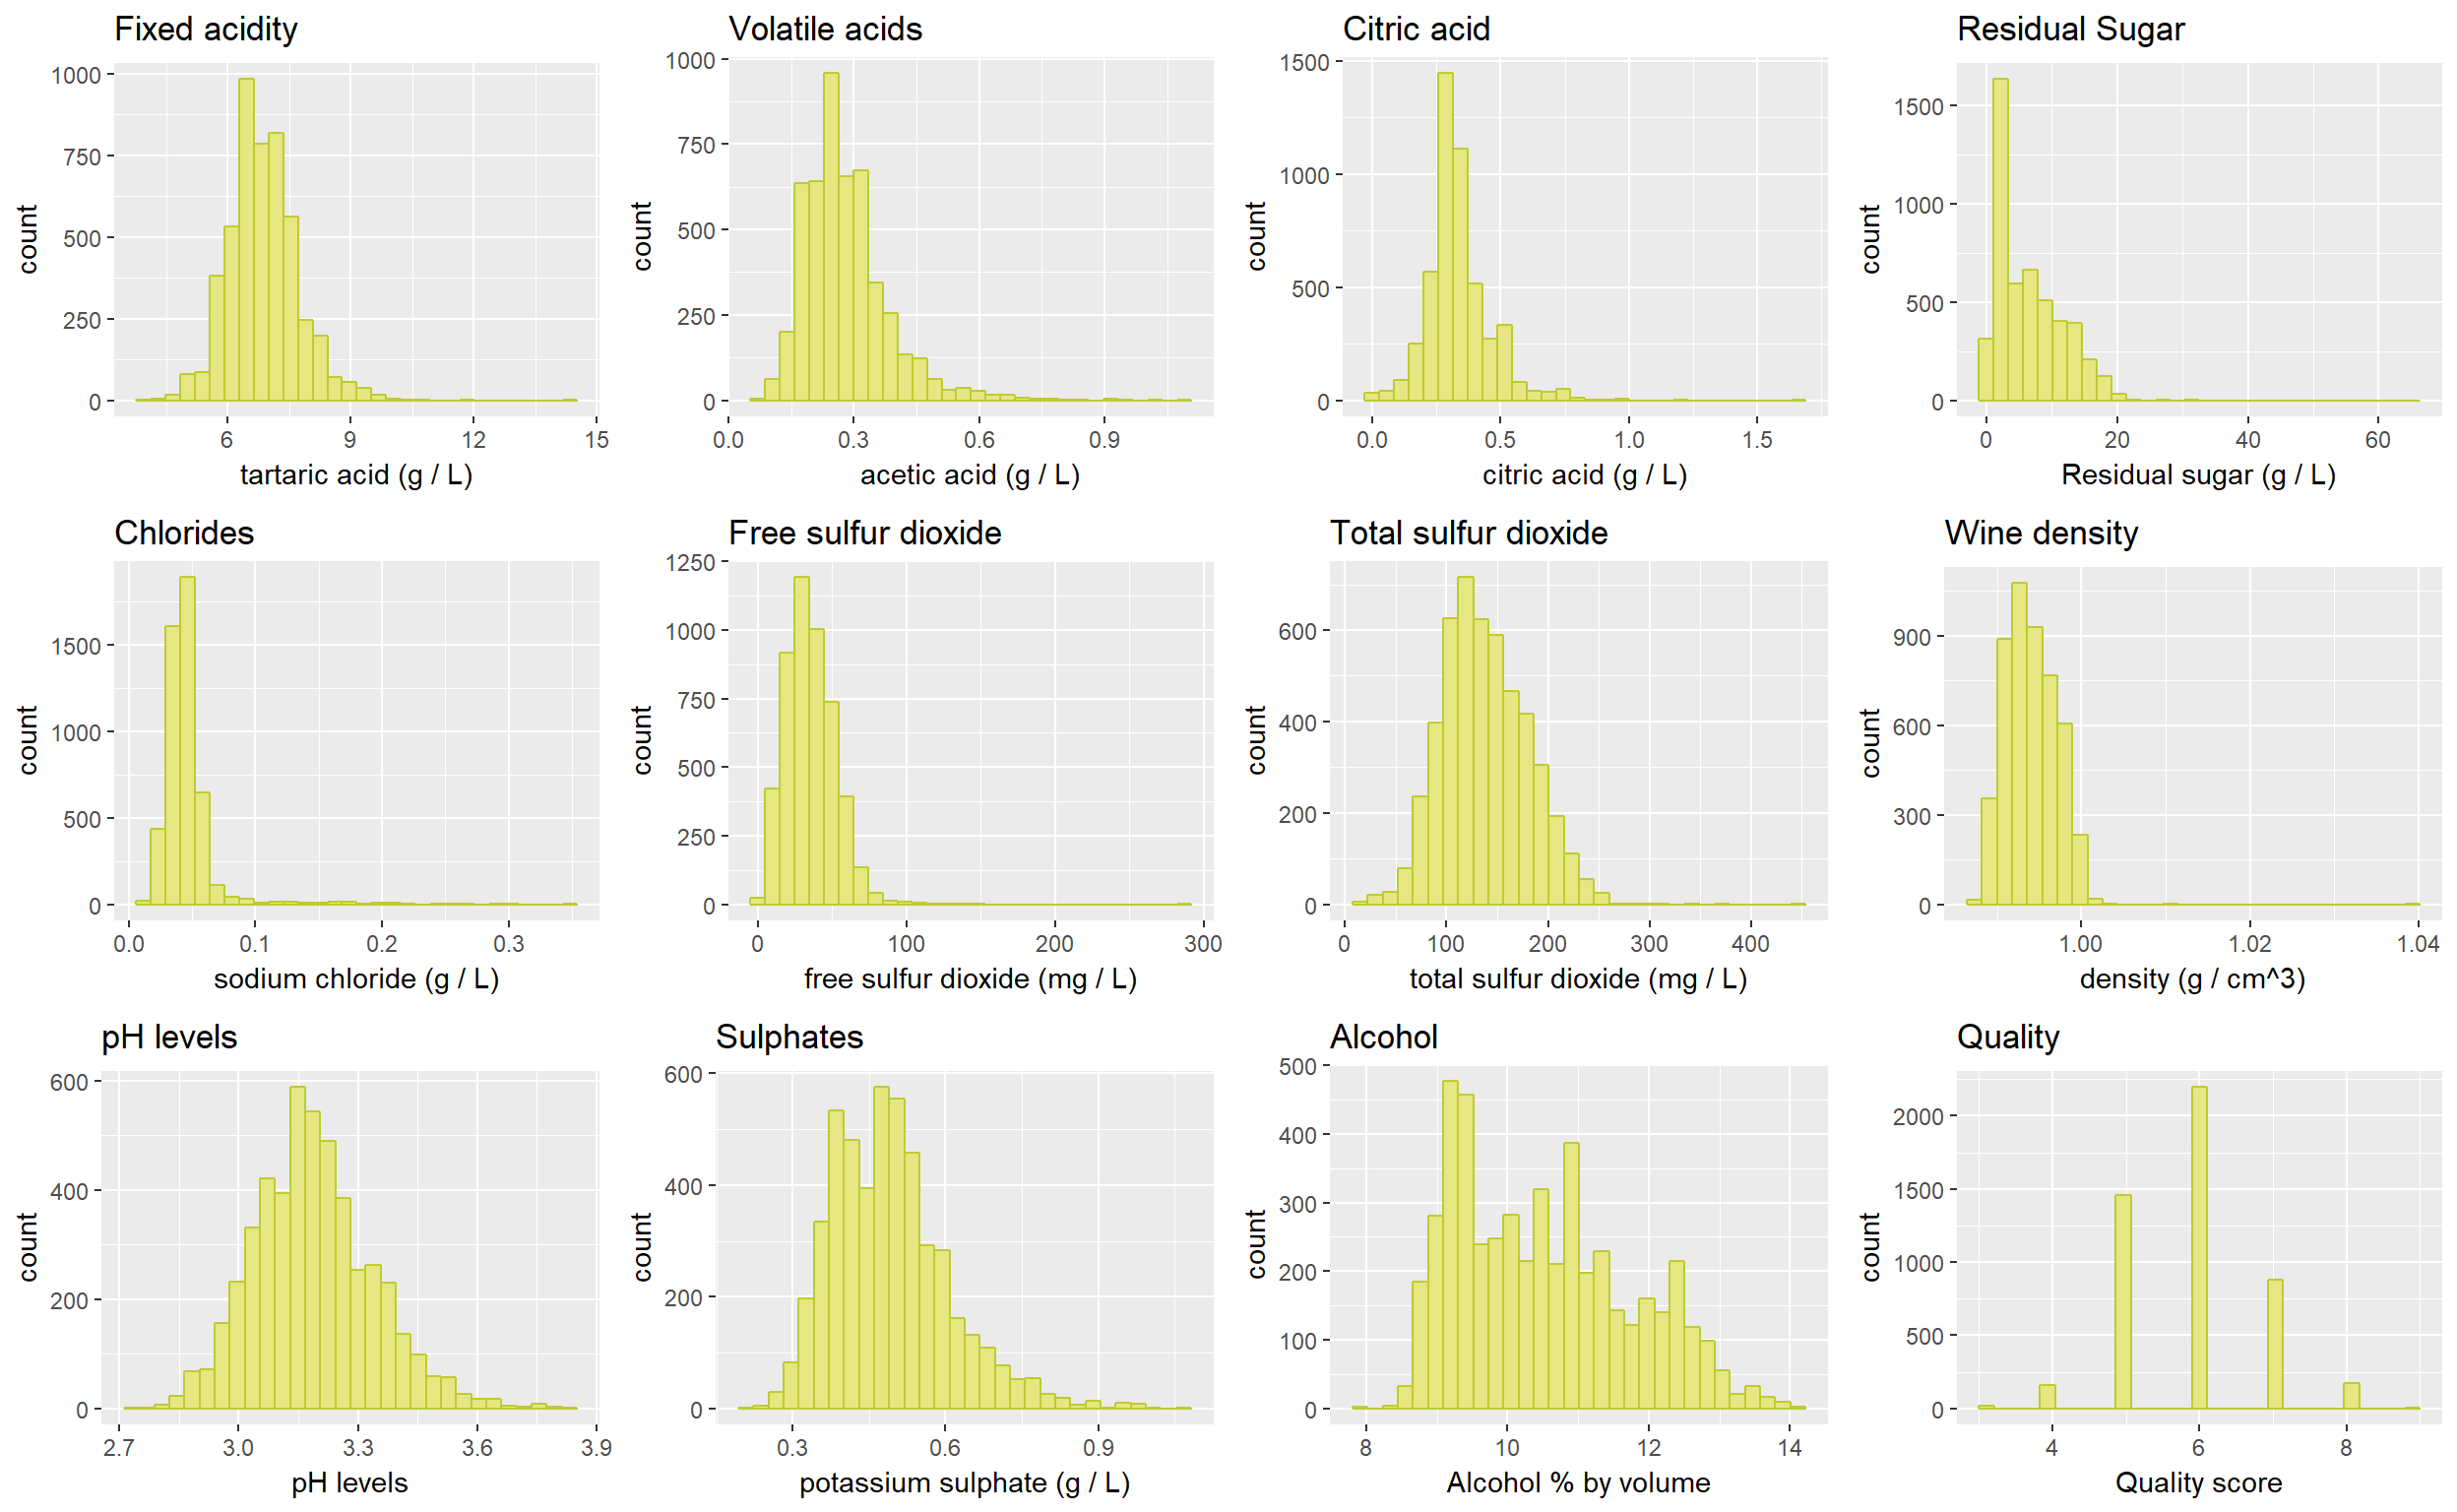

**fixed.acidity**      <br> 
Min.   : 3.800    <br>
1st Qu.: 6.300    <br>
Median : 6.800    <br>
Mean   : 6.855    <br>
3rd Qu.: 7.300    <br>
Max.   :14.200    <br>

**volatile.acidity**   <br>
Min.   :0.0800    <br>
1st Qu.:0.2100    <br>
Median :0.2600    <br>
Mean   :0.2782    <br>
3rd Qu.:0.3200    <br>
Max.   :1.1000    <br>

**citric.acid**    <br>
Min.   :0.0000   <br>
1st Qu.:0.2700   <br>
Median :0.3200   <br>
Mean   :0.3342   <br>
3rd Qu.:0.3900   <br>
Max.   :1.6600  <br>

**residual.sugar**     <br>  
Min.   : 0.600     <br>  
1st Qu.: 1.700     <br>  
Median : 5.200     <br>  
Mean   : 6.391     <br>  
3rd Qu.: 9.900     <br>  
Max.   :65.800     <br>  

**chlorides**      <br>    
Min.   :0.00900     <br>  
1st Qu.:0.03600    <br>
Median :0.04300    <br>
Mean   :0.04577    <br>
3rd Qu.:0.05000    <br>
Max.   :0.34600    <br>

**free.sulfur.dioxide** <br>
Min.   :  2.00      <br>
1st Qu.: 23.00      <br>
Median : 34.00      <br>
Mean   : 35.31      <br>
3rd Qu.: 46.00      <br>
Max.   :289.00      <br>

**total.sulfur.dioxide**    <br>   
Min.   :  9.0           <br>   
1st Qu.:108.0           <br>   
Median :134.0           <br>   
Mean   :138.4           <br>   
3rd Qu.:167.0           <br>   
Max.   :440.0           <br>   

**density**    
Min.   :0.9871    <br>
1st Qu.:0.9917    <br>
Median :0.9937    <br>
Mean   :0.9940    <br>
3rd Qu.:0.9961    <br>
Max.   :1.0390    <br>

**pH**   
Min.   :2.720    <br>
1st Qu.:3.090    <br>
Median :3.180    <br>
Mean   :3.188    <br>
3rd Qu.:3.280    <br>
Max.   :3.820    <br>

**sulphates**      <br>
Min.   :0.2200   <br>
1st Qu.:0.4100   <br>
Median :0.4700   <br>
Mean   :0.4898   <br>
3rd Qu.:0.5500   <br>
Max.   :1.0800   <br>

**alcohol**         
Min.   : 8.00   <br>
1st Qu.: 9.50   <br>
Median :10.40   <br>
Mean   :10.51   <br>
3rd Qu.:11.40   <br>
Max.   :14.20   <br>

**quality**      <br>
Min.   :3.000   <br>
1st Qu.:5.000   <br>
Median :6.000   <br>
Mean   :5.878   <br>
3rd Qu.:6.000   <br>
Max.   :9.000 <br>


## Correlation Matrix

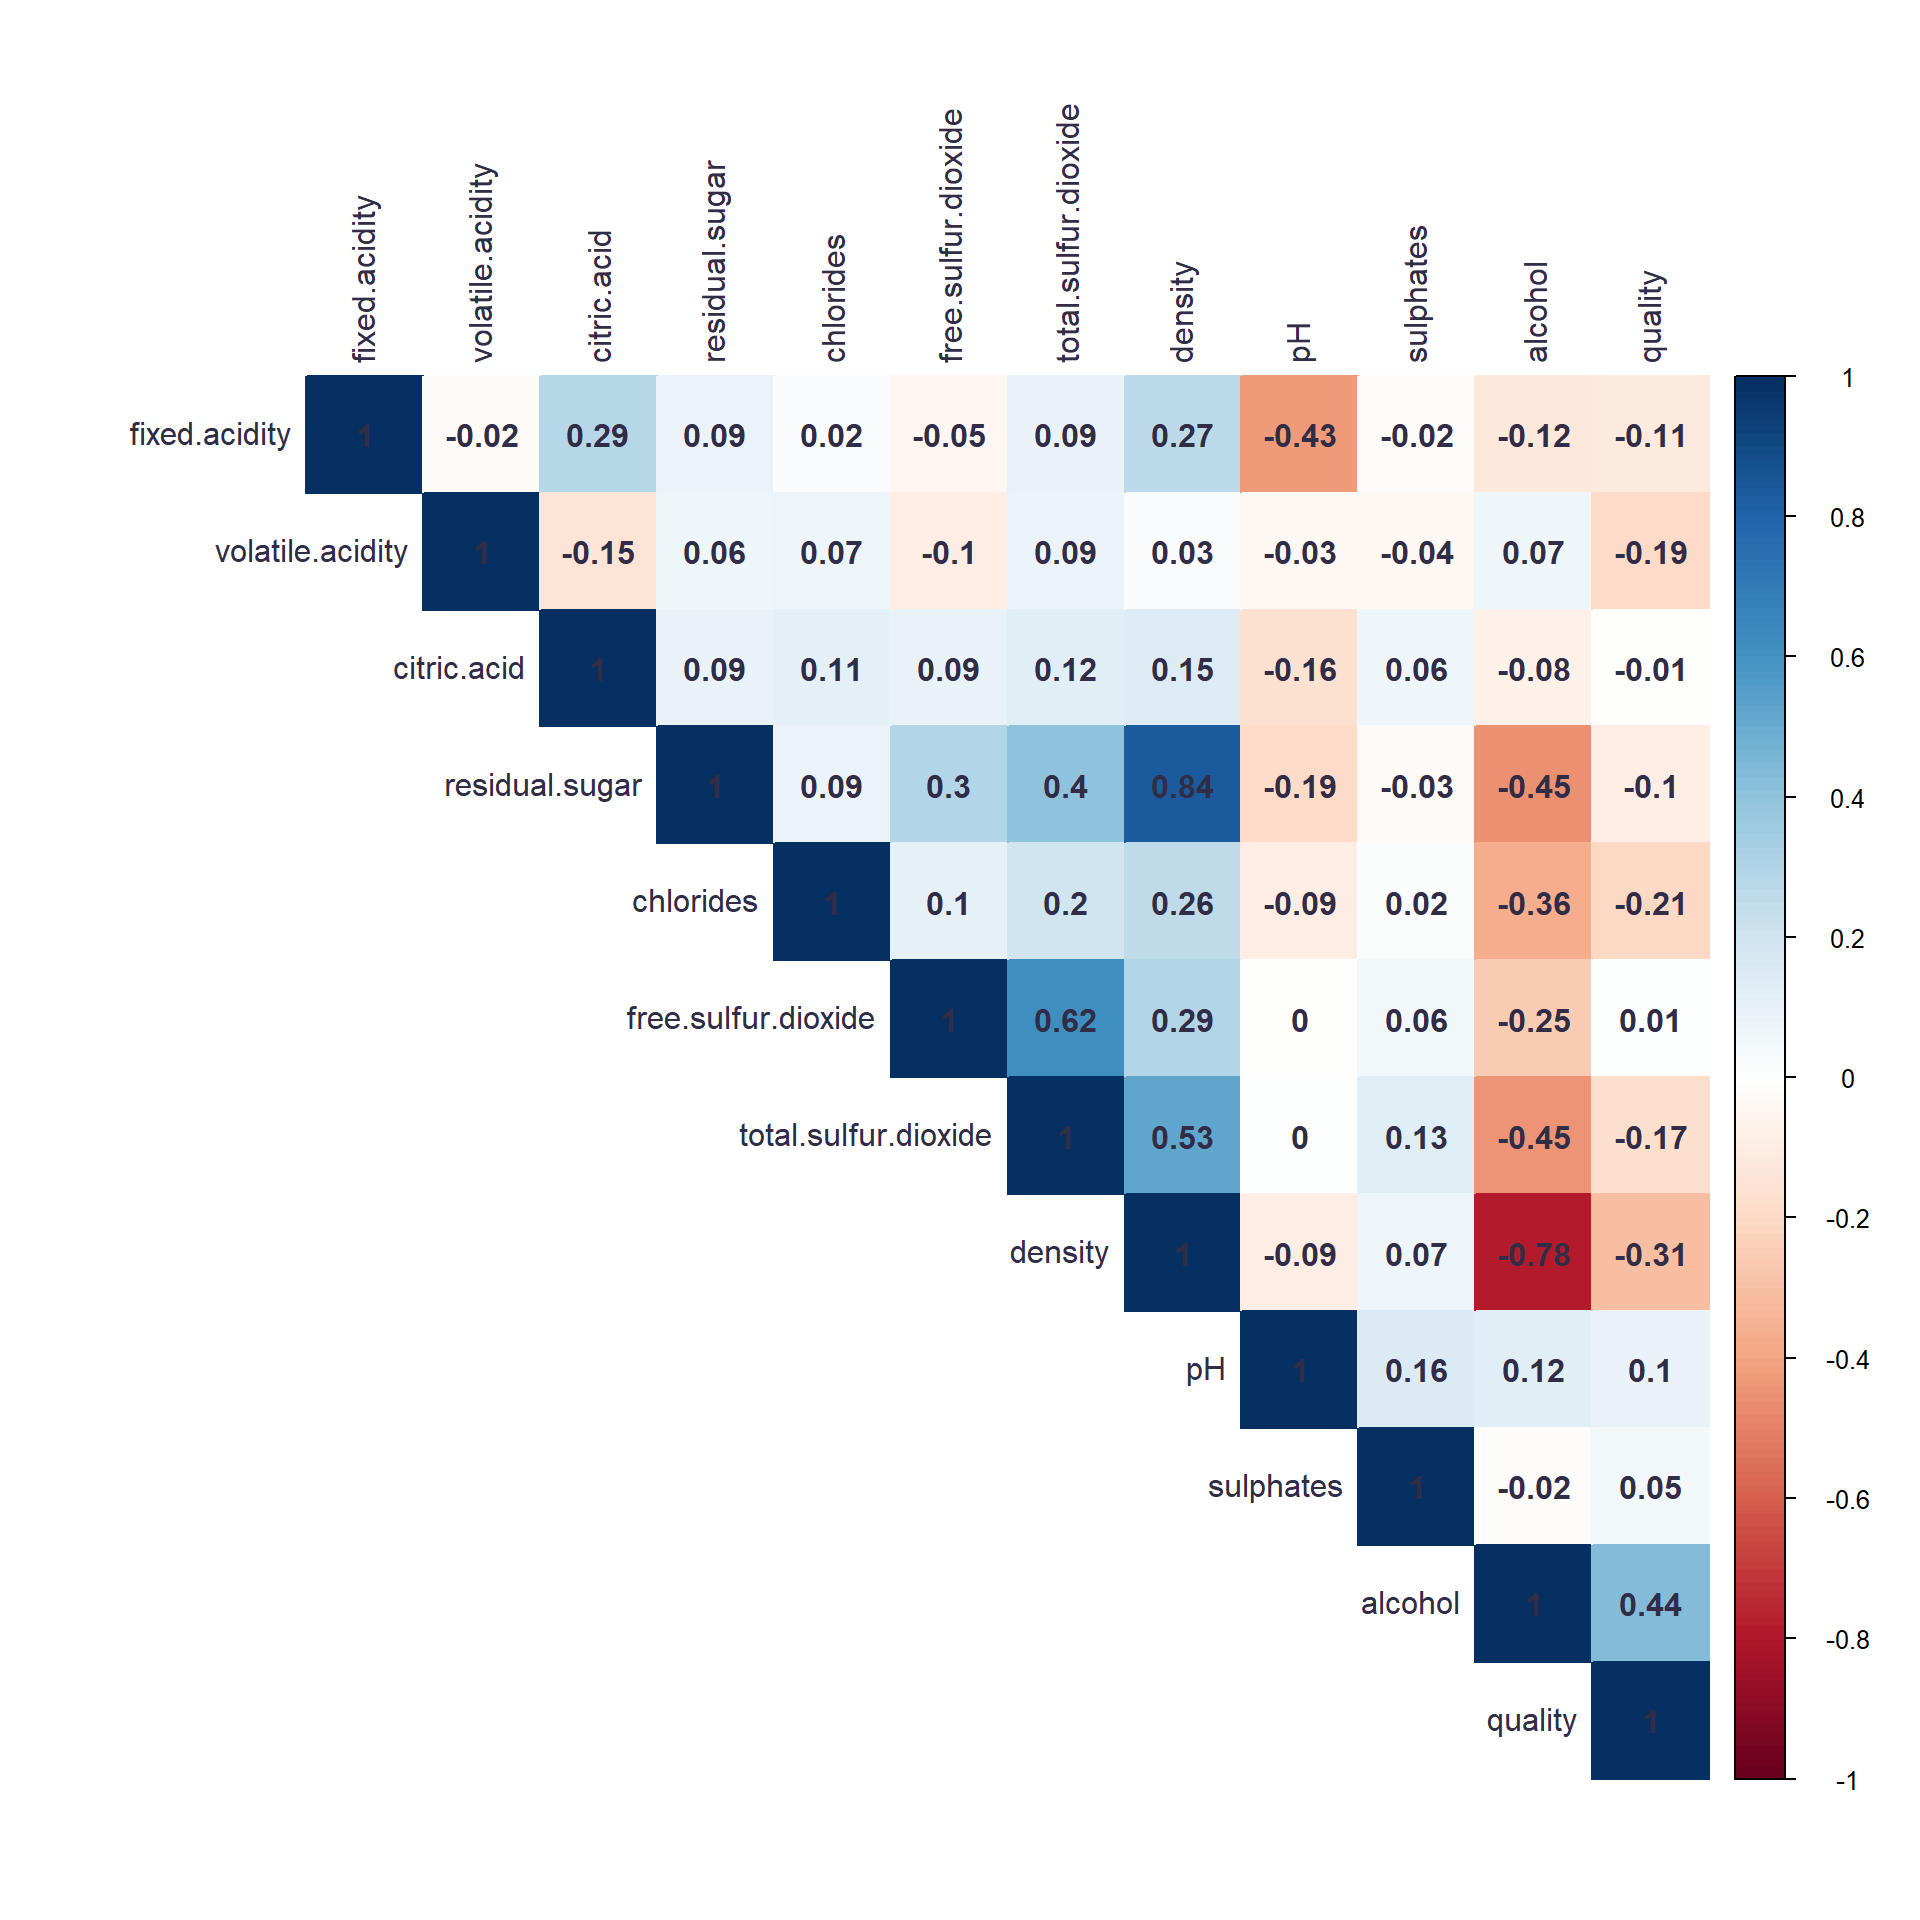

Lookin at the correlation matrix, the main feature of interest is how Quality is related with the chemical properties of wines in the sample.
* Quality and alcohol % have moderate positive correlation 0.44, and it is the biggest correlation comparing to tother characteristics.
* Quality and density have a lower negative correlation of -0.31. 
* Quality has a very weak negative correltion with Volatile acidity, chlorides at -0.21 and -0.19 respectively. 
* Quality and Residual Sugar have very weak correllation of -0.1. Fixed Acidity (-0.11), Citric Acidity (-0.01) and have very weak correaliton with quality rating.

Looking at the other variables: 
* Density and Residual sugar have the stronges positive relationship of 0.84. 
* Density and Alcohol have the strongest negative correlation of - 0.78, which can be expected. 
* Density and Total SO2 have moderate correlation of 0.53. 
* Alcohol has moderate negative correlations with Residual sugar(-0.45), Total SO2 (-0.45) and Chlorides (-0.36). 
* Fixed Acidity has a moderate negative correlation with pH level of -0.43, which is expected as pH defines how basic or acidic a substance is.

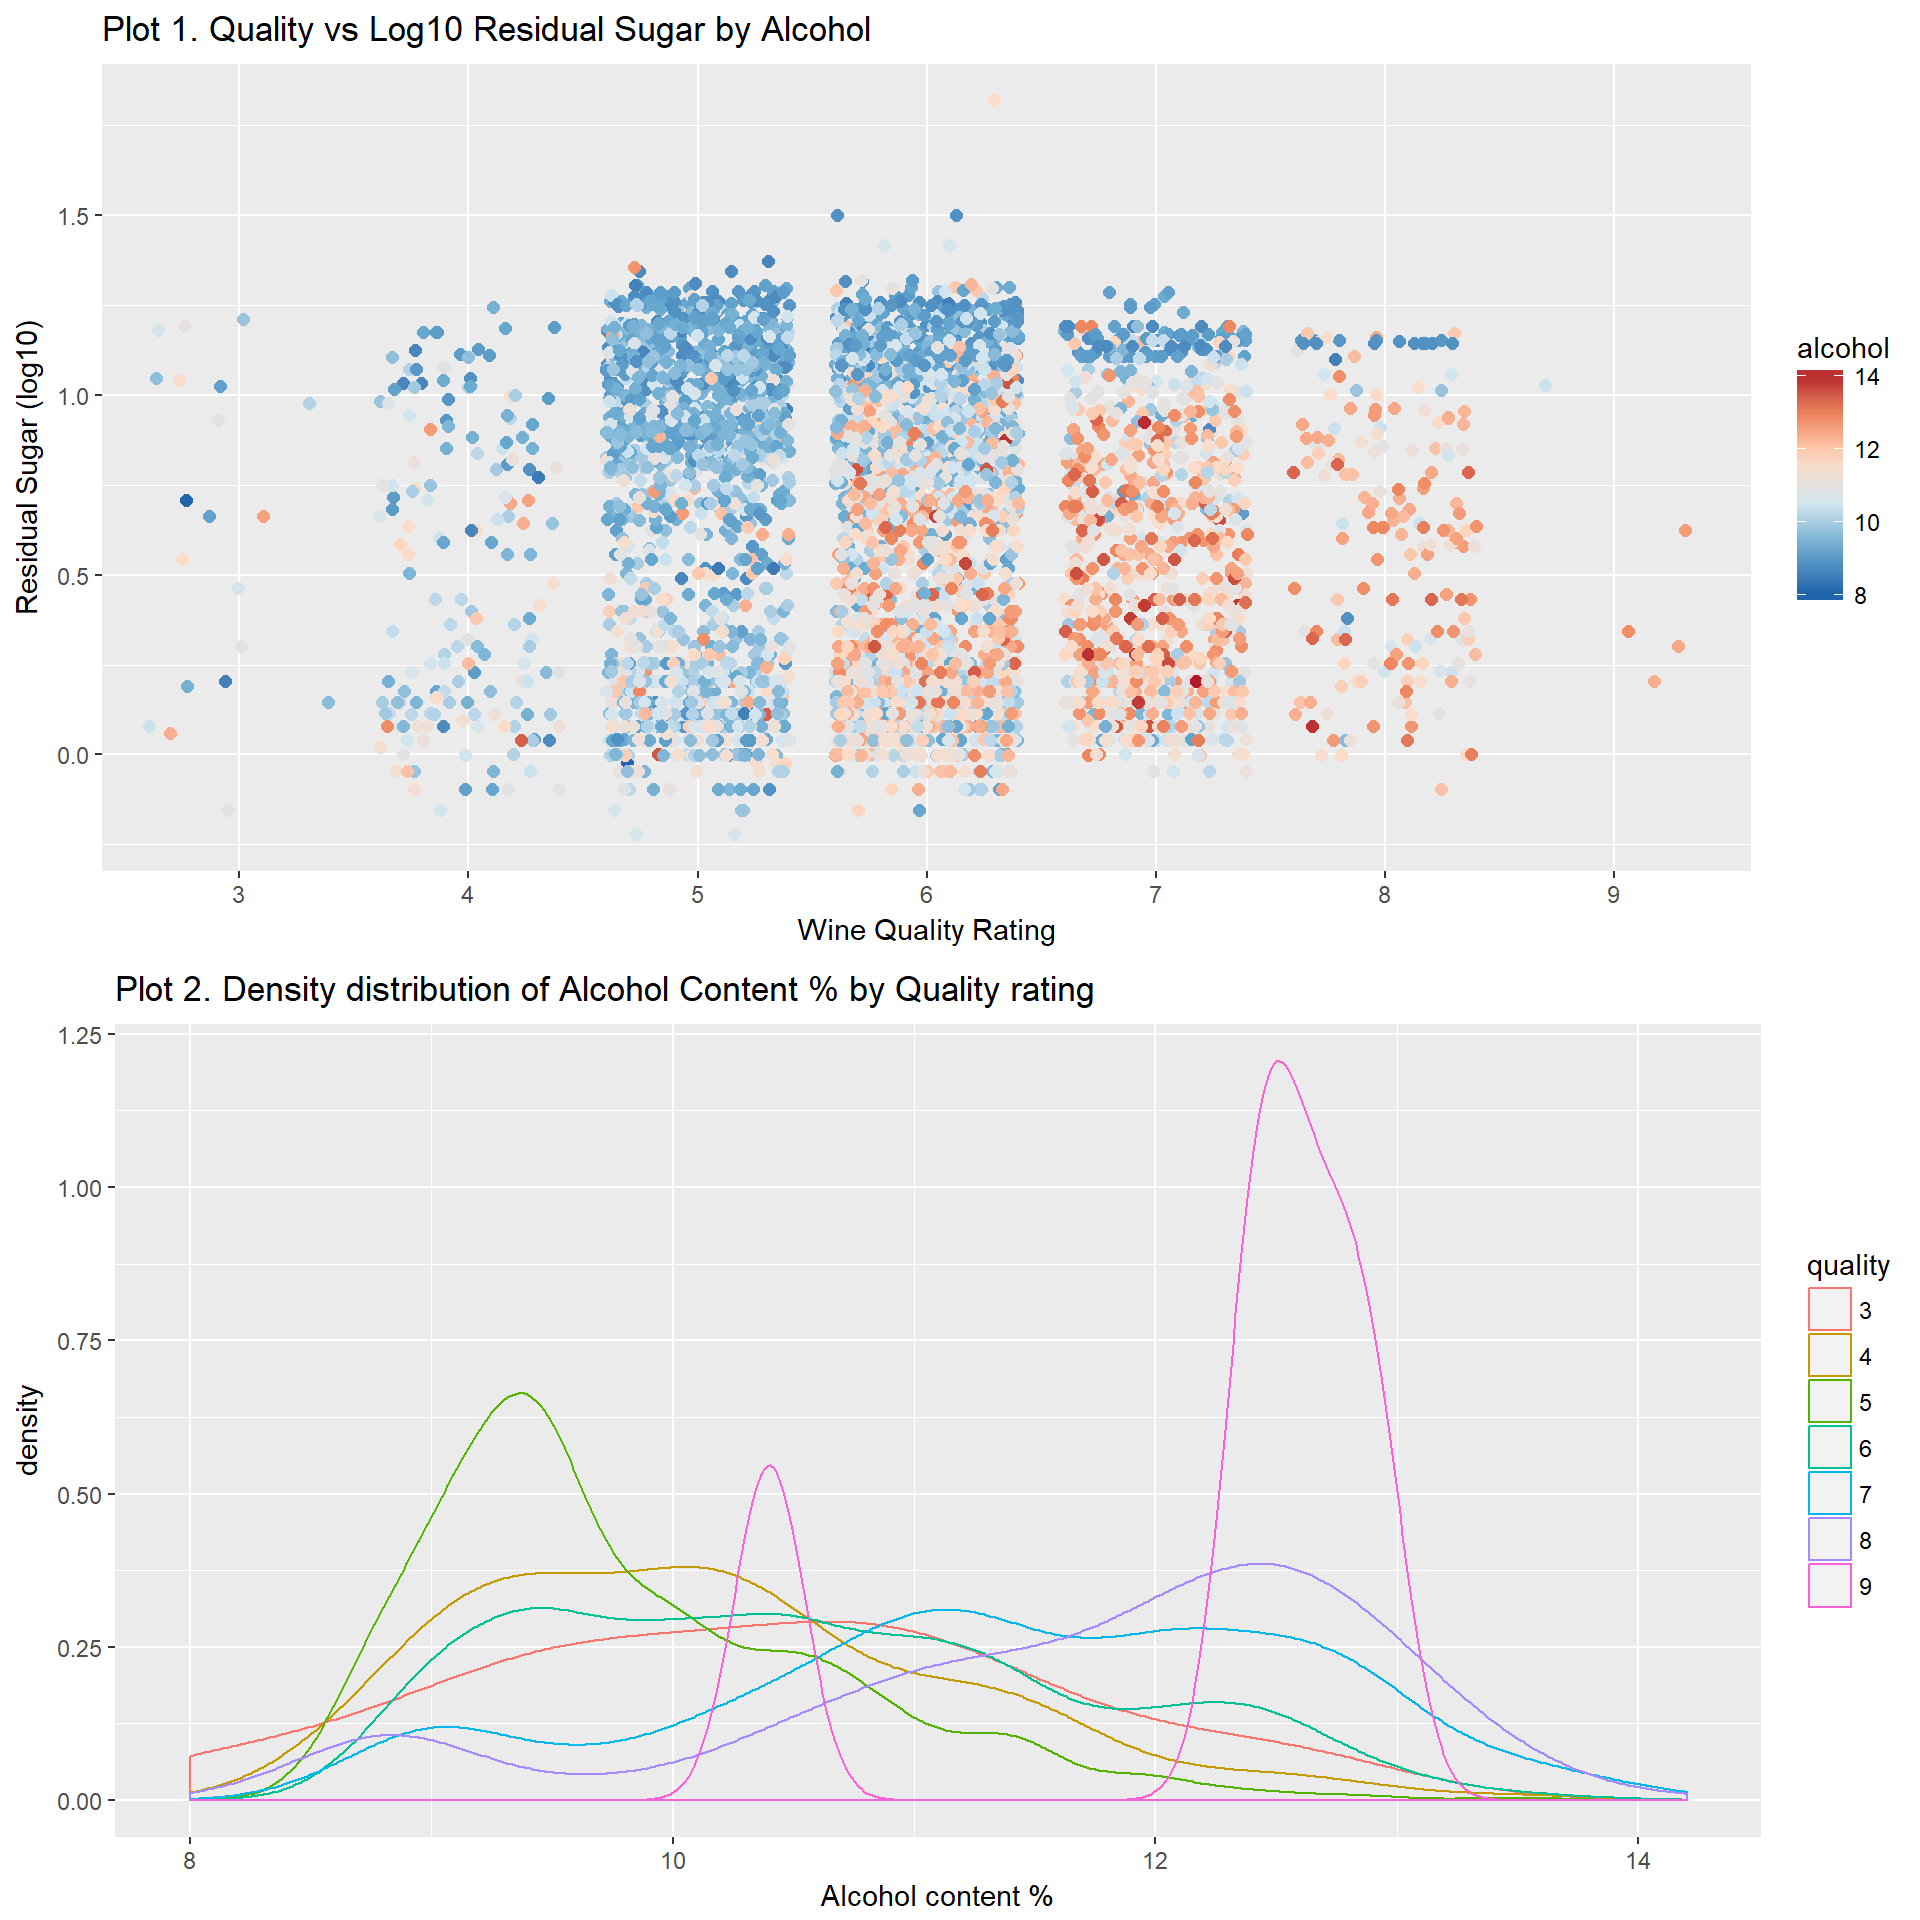

Plot 1: There is an interesting relationship between Residual Sugar, Alcohol and Quality rating, as higher alcohol content is observed in wines rated 6 and above. Further more the plot confirms residual sugar is prevalent in wines with smaller alcohol content. 
<br>

Plot2: The following graphs shows density with which alcohol is distributed according to quality rating. This reinforces a positive correlation as in boxplots above, with lower alcohol levels scorring 5 and 6 ratings, and higher alcohol content scorring 7 and 8 ratings.

### Reflection

It was revealed that white wine with higher Alcohol content tends to score higher. 
Alcohol is an active characteristic compared to other chemicals, as it has the ability to mask unpleasant smells or excess volatile acidity during tasting.

The quality rating given by a somelier is based on more than the phisiochemical properties of the wine. For instance, period and conditions of wine aging, grape type and tasting conditions are all very important aspects of an acurate quality rating of wines. None of these aspects were given in an initial data set due to confidentiality. 

A bigger sample would have enabled to have more category counts, and perhaps it would have improved some bias in this analisys.